<h1><b><i>Ο αλγόριθμος Προσομοιωμένης Ανόπτησης</i> (<i>Simulated Annealing</i>)</b></h1>

Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο της <i>Προσομοιωμένης Ανόπτησης</i> (<i>Simulated Annealing</i>), περισσότερες πληροφορίες για τον οποίο μπορείτε να βρείτε <a href="https://en.wikipedia.org/wiki/Simulated_annealing">εδώ</a>.Θα χρησιμοποιήσετε τα <b>δύο έτοιμα</b> προγράμματα που δίνονται στη συνέχεια. Τα προγράμματα αυτά επιλύουν το πρόβλημα του <i>Περιπλανώμενου Πωλητή</i> (<i>Travelling Salesman Problem</i>, <i>TSP</i>), περισσότερες πληροφορίες για το οποίο μπορείτε να βρείτε <a href="https://en.wikipedia.org/wiki/Travelling_salesman_problem">εδώ</a>. Το πρώτο πρόγραμμα επιλύει το πρόβλημα <i>TSP</i> χρησιμοποιώντας τον αλγόριθμο <i>Simulated Annealing</i> και το δεύτερο επιλύει το ίδιο πρόβλημα, χρησιμοποιώντας τον αλγόριθμο <a href="https://en.wikipedia.org/wiki/Hill_climbing"><i>Hill Climbing</i></a>. Η επίλυση του προβλήματος γίνεται για <b>150 πόλεις</b>.

<b>Σημείωση:</b> Βεβαιωθείτε ότι το <b><i>Runtime Environment</i></b> είναι για <b><i>Python 2</i></b>.

<h2><b><i>Simulated Annealing</i></b></h2>

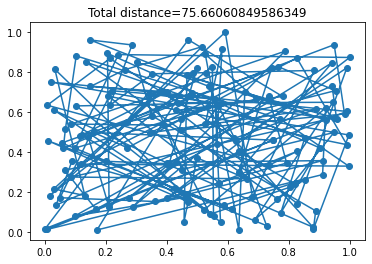

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [22]:
""" Traveling salesman problem solved using Simulated Annealing.
http://www.physics.rutgers.edu/~haule/681/src_MC/python_codes/salesman.py
"""
from scipy import *
from pylab import *

def Distance(R1, R2):
    return sqrt((R1[0]-R2[0])**2+(R1[1]-R2[1])**2)

def TotalDistance(city, R):
    dist=0
    for i in range(len(city)-1):
        dist += Distance(R[city[i]],R[city[i+1]])
    dist += Distance(R[city[-1]],R[city[0]])
    return dist
    
def reverse(city, n):
    nct = len(city)
    nn = (1+ ((n[1]-n[0]) % nct))/2 # half the lenght of the segment to be reversed
    # the segment is reversed in the following way n[0]<->n[1], n[0]+1<->n[1]-1, n[0]+2<->n[1]-2,...
    # Start at the ends of the segment and swap pairs of cities, moving towards the center.
    for j in range(nn):
        k = (n[0]+j) % nct
        l = (n[1]-j) % nct
        (city[k],city[l]) = (city[l],city[k])  # swap
    
def transpt(city, n):
    nct = len(city)
    
    newcity=[]
    # Segment in the range n[0]...n[1]
    for j in range( (n[1]-n[0])%nct + 1):
        newcity.append(city[ (j+n[0])%nct ])
    # is followed by segment n[5]...n[2]
    for j in range( (n[2]-n[5])%nct + 1):
        newcity.append(city[ (j+n[5])%nct ])
    # is followed by segment n[3]...n[4]
    for j in range( (n[4]-n[3])%nct + 1):
        newcity.append(city[ (j+n[3])%nct ])
    return newcity

def Plot(city, R, dist):
    # Plot
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]
    Pt = array(Pt)
    title('Total distance='+str(dist))
    plot(Pt[:,0], Pt[:,1], '-o')
    show()

if __name__=='__main__':

    ncity = 150        # Number of cities to visit
    maxTsteps = 100    # Temperature is lowered not more than maxTsteps
    Tstart = 0.2       # Starting temperature - has to be high enough
    fCool = 0.9        # Factor to multiply temperature at each cooling step
    maxSteps = 100*ncity     # Number of steps at constant temperature
    maxAccepted = 10*ncity   # Number of accepted steps at constant temperature

    Preverse = 0.5      # How often to choose reverse/transpose trial move

    # Choosing city coordinates
    R=[]  # coordinates of cities are choosen randomly
    for i in range(ncity):
        R.append( [rand(),rand()] )
    R = array(R)

    # The index table -- the order the cities are visited.
    city = range(ncity)
    # Distance of the travel at the beginning
    dist = TotalDistance(city, R)

    # Stores points of a move
    n = zeros(6, dtype=int)
    nct = len(R) # number of cities
    
    T = Tstart # temperature

    total_steps = 0

    Plot(city, R, dist)
    
    for t in range(maxTsteps):  # Over temperature

        accepted = 0
        for i in range(maxSteps): # At each temperature, many Monte Carlo steps
            
            while True: # Will find two random cities sufficiently close by
                # Two cities n[0] and n[1] are choosen at random
                n[0] = int((nct)*rand())     # select one city
                n[1] = int((nct-1)*rand())   # select another city, but not the same
                if (n[1] >= n[0]): n[1] += 1   #
                if (n[1] < n[0]): (n[0],n[1]) = (n[1],n[0]) # swap, because it must be: n[0]<n[1]
                nn = (n[0]+nct -n[1]-1) % nct  # number of cities not on the segment n[0]..n[1]
                if nn>=3: break
        
            # We want to have one index before and one after the two cities
            # The order hence is [n2,n0,n1,n3]
            n[2] = (n[0]-1) % nct  # index before n0  -- see figure in the lecture notes
            n[3] = (n[1]+1) % nct  # index after n2   -- see figure in the lecture notes
            
            if Preverse > rand(): 
                # Here we reverse a segment
                # What would be the cost to reverse the path between city[n[0]]-city[n[1]]?
                de = Distance(R[city[n[2]]],R[city[n[1]]]) + Distance(R[city[n[3]]],R[city[n[0]]]) - Distance(R[city[n[2]]],R[city[n[0]]]) - Distance(R[city[n[3]]],R[city[n[1]]])
                
                if de<0 or exp(-de/T)>rand(): # Metropolis
                    accepted += 1
                    dist += de
                    reverse(city, n)
            else:
                # Here we transpose a segment
                nc = (n[1]+1+ int(rand()*(nn-1)))%nct  # Another point outside n[0],n[1] segment. See picture in lecture nodes!
                n[4] = nc
                n[5] = (nc+1) % nct
        
                # Cost to transpose a segment
                de = -Distance(R[city[n[1]]],R[city[n[3]]]) - Distance(R[city[n[0]]],R[city[n[2]]]) - Distance(R[city[n[4]]],R[city[n[5]]])
                de += Distance(R[city[n[0]]],R[city[n[4]]]) + Distance(R[city[n[1]]],R[city[n[5]]]) + Distance(R[city[n[2]]],R[city[n[3]]])
                
                if de<0 or exp(-de/T)>rand(): # Metropolis
                    accepted += 1
                    dist += de
                    city = transpt(city, n)
                    
            if accepted > maxAccepted: break

        # Plot
        Plot(city, R, dist)
            
        print "T=%10.5f , distance= %10.5f , accepted steps= %d" %(T, dist, accepted)
        T *= fCool             # The system is cooled down
        total_steps += accepted
        if accepted == 0: break  # If the path does not want to change any more, we can stop

        
    Plot(city, R, dist)
    print "Total accepted steps to solution: %d"%(total_steps)

<h2><b><i>Hill Climbing</i></b></h2>

In [23]:

""" Traveling salesman problem solved using Simulated Annealing.
http://www.physics.rutgers.edu/~haule/681/src_MC/python_codes/salesman.py
"""
from scipy import *
from pylab import *

def Distance(R1, R2):
    return sqrt((R1[0]-R2[0])**2+(R1[1]-R2[1])**2)

def TotalDistance(city, R):
    dist=0
    for i in range(len(city)-1):
        dist += Distance(R[city[i]],R[city[i+1]])
    dist += Distance(R[city[-1]],R[city[0]])
    return dist
    
def reverse(city, n):
    nct = len(city)
    nn = (1+ ((n[1]-n[0]) % nct))/2 # half the lenght of the segment to be reversed
    # the segment is reversed in the following way n[0]<->n[1], n[0]+1<->n[1]-1, n[0]+2<->n[1]-2,...
    # Start at the ends of the segment and swap pairs of cities, moving towards the center.
    for j in range(nn):
        k = (n[0]+j) % nct
        l = (n[1]-j) % nct
        (city[k],city[l]) = (city[l],city[k])  # swap
    
def transpt(city, n):
    nct = len(city)
    
    newcity=[]
    # Segment in the range n[0]...n[1]
    for j in range( (n[1]-n[0])%nct + 1):
        newcity.append(city[ (j+n[0])%nct ])
    # is followed by segment n[5]...n[2]
    for j in range( (n[2]-n[5])%nct + 1):
        newcity.append(city[ (j+n[5])%nct ])
    # is followed by segment n[3]...n[4]
    for j in range( (n[4]-n[3])%nct + 1):
        newcity.append(city[ (j+n[3])%nct ])
    return newcity

def Plot(city, R, dist):
    # Plot
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]
    Pt = array(Pt)
    title('Total distance='+str(dist))
    plot(Pt[:,0], Pt[:,1], '-o')
    show()

if __name__=='__main__':

    ncity = 150       # Number of cities to visit
    maxTsteps = 100    # Temperature is lowered not more than maxTsteps
    Tstart = 0.2       # Starting temperature - has to be high enough
    fCool = 0.9        # Factor to multiply temperature at each cooling step
    maxSteps = 100*ncity     # Number of steps at constant temperature
    maxAccepted = 10*ncity   # Number of accepted steps at constant temperature

    Preverse = 0.5      # How often to choose reverse/transpose trial move

    # Choosing city coordinates
    R=[]  # coordinates of cities are choosen randomly
    for i in range(ncity):
        R.append( [rand(),rand()] )
    R = array(R)

    # The index table -- the order the cities are visited.
    city = range(ncity)
    # Distance of the travel at the beginning
    dist = TotalDistance(city, R)

    # Stores points of a move
    n = zeros(6, dtype=int)
    nct = len(R) # number of cities
    
    T = Tstart # temperature

    Plot(city, R, dist)

    total_steps = 0
    
    for t in range(maxTsteps):  # Over temperature

        accepted = 0
        for i in range(maxSteps): # At each temperature, many Monte Carlo steps
            
            while True: # Will find two random cities sufficiently close by
                # Two cities n[0] and n[1] are choosen at random
                n[0] = int((nct)*rand())     # select one city
                n[1] = int((nct-1)*rand())   # select another city, but not the same
                if (n[1] >= n[0]): n[1] += 1   #
                if (n[1] < n[0]): (n[0],n[1]) = (n[1],n[0]) # swap, because it must be: n[0]<n[1]
                nn = (n[0]+nct -n[1]-1) % nct  # number of cities not on the segment n[0]..n[1]
                if nn>=3: break
        
            # We want to have one index before and one after the two cities
            # The order hence is [n2,n0,n1,n3]
            n[2] = (n[0]-1) % nct  # index before n0  -- see figure in the lecture notes
            n[3] = (n[1]+1) % nct  # index after n2   -- see figure in the lecture notes
            
            if Preverse > rand(): 
                # Here we reverse a segment
                # What would be the cost to reverse the path between city[n[0]]-city[n[1]]?
                de = Distance(R[city[n[2]]],R[city[n[1]]]) + Distance(R[city[n[3]]],R[city[n[0]]]) - Distance(R[city[n[2]]],R[city[n[0]]]) - Distance(R[city[n[3]]],R[city[n[1]]])
                
                if de<0:
                    accepted += 1
                    dist += de
                    reverse(city, n)
            else:
                # Here we transpose a segment
                nc = (n[1]+1+ int(rand()*(nn-1)))%nct  # Another point outside n[0],n[1] segment. See picture in lecture nodes!
                n[4] = nc
                n[5] = (nc+1) % nct
        
                # Cost to transpose a segment
                de = -Distance(R[city[n[1]]],R[city[n[3]]]) - Distance(R[city[n[0]]],R[city[n[2]]]) - Distance(R[city[n[4]]],R[city[n[5]]])
                de += Distance(R[city[n[0]]],R[city[n[4]]]) + Distance(R[city[n[1]]],R[city[n[5]]]) + Distance(R[city[n[2]]],R[city[n[3]]]) ## new segment 
                
                if de<0:
                    accepted += 1
                    dist += de
                    city = transpt(city, n)
                    
            if accepted > maxAccepted: break

        # Plot
        Plot(city, R, dist)
            
        print "T=%10.5f , distance= %10.5f , accepted steps= %d" %(T, dist, accepted)
        T *= fCool             # The system is cooled down
        total_steps += accepted
        if accepted == 0: break  # If the path does not want to change any more, we can stop

    
    Plot(city, R, dist)
    print "Total accepted steps to solution: %d"%(total_steps)

SyntaxError: invalid syntax (<ipython-input-23-678189388146>, line 131)

<h3><b><i>Ερωτήσεις</i></b></h3>

<lu>
<li>1. Να διατυπώσετε το πρόβλημα <i>TSP</i>.</li>
<br>
<li>2. Να περιγράψετε, σύντομα, τη λειτουργία του αλγορίθμου <i>Hill Climbing</i> και να εξηγήσετε γιατί μπορεί να οδηγήσει σε κακές λύσεις.</li>
<br>
<li>3. Να περιγράψετε, σύντομα, τη λειτουργία του αλγορίθμου <i>Simulated Annealing</i> και γιατί είναι δυνατό να οδηγήσει σε καλύτερες λύσεις από τον αλγόριθμο <i>Hill Climbing</i>.</li>
<br>
<li>4. Να εκτελέσετε τα παραπάνω προγράμματα. Να καταγράψετε τις εξόδους τους. Δεν είναι απαραίτητο να κρατήσετε όλα τα διαγράμματα, αλλά μερικά από τα πιο αντιπροσωπευτικά.</li>
<br>
<li>5. Να σχολιάσετε τις διαφορές των δύο αλγορίθμων ως προς την τιμή της τελικής λύσης και το συνολικό αριθμό των βημάτων που απαιτούνται για να οδηγηθούμε σε αυτήν. Ποιος αλγόριθμος επιλέγει την καλύτερη λύση; Ποιος αλγόριθμος καθυστερεί πιο πολύ;</li>
<br>
<li>6. Μελετώντας τα διαγράμματα που επιστρέφουν ως έξοδο τα παραπάνω προγράμματα, να σχολιάσετε πόσο απότομες είναι οι μεταβολές ανάμεσα στις λύσεις που επιστρέφουν οι αλγόριθμοι σε κάθε βήμα μέχρι να φτάσουν στην τελική λύση. Σε ένα δεδομένο βήμα, επιλέγεται πάντα μια καλύτερη λύση ή κάποιος από τους δύο αλγορίθμους επιλέγει και χειρότερες λύσεις;</li>
</lu>

## Απαντήσεις: 

1. Το πρόβλημα του πωλητή ταξιδιού (που ονομάζεται επίσης πρόβλημα ταξιδιωτικού πωλητήή TSP ) θέτει την ακόλουθη ερώτηση: "Δεδομένης μιας λίστας πόλεων και των αποστάσεων μεταξύ κάθε ζεύγους πόλεων, ποια είναι η συντομότερη δυνατή διαδρομή που επισκέπτεται κάθε πόλη ακριβώς μία φορά και επιστρέφει στην πόλη προέλευσης; " Πρόκειται για ένα δύσκολο NP πρόβλημα στη συνδυαστική βελτιστοποίηση, σημαντικό στη θεωρητική επιστήμη των υπολογιστών και στην έρευνα λειτουργίας 

2. Στην αριθμητική ανάλυση, η ορειβασία είναι μια τεχνική μαθηματικής βελτιστοποίησης που ανήκει στην οικογένεια της τοπικής αναζήτησης . Είναι ένας επαναληπτικός αλγόριθμος που ξεκινά με μια αυθαίρετη λύση σε ένα πρόβλημα, και στη συνέχεια προσπαθεί να βρει μια καλύτερη λύση κάνοντας μια σταδιακή αλλαγή στη λύση. Εάν η αλλαγή παράγει μια καλύτερη λύση, μια άλλη σταδιακή αλλαγή γίνεται στη νέα λύση, και ούτω καθεξής έως ότου δεν μπορούν να βρεθούν περαιτέρω βελτιώσεις.Για παράδειγμα, η αναρρίχηση του λόφου μπορεί να εφαρμοστεί στο πρόβλημα του πωλητή που ταξιδεύει . Είναι εύκολο να βρείτε μια αρχική λύση που επισκέπτεται όλες τις πόλεις, αλλά πιθανότατα θα είναι πολύ κακή σε σύγκριση με τη βέλτιστη λύση. Ο αλγόριθμος ξεκινά με μια τέτοια λύση και κάνει μικρές βελτιώσεις σε αυτόν, όπως η αλλαγή της σειράς με την οποία επισκέπτονται δύο πόλεις. Τελικά, είναι πιθανό να επιτευχθεί πολύ πιο σύντομη διαδρομή. 
Παράδειγμα: Αρχικα επιλέγει 2 τυχαιες κοντινες πολεις ($n_0, n_1$) αλλα και τις γειτονικές πόλεις ($n_2 = n_0 -1, n3=n_1 +1$). Mε 50% πιθανότητα επιλέγεται μια κίνηση, ειτε αντιστρέφωντας όλες τις επιλογές στο παραπάνω διαστημα, είτε να επιλέξει κάποια ε΄πόμενη $n_4$ και να μεταθέσει όλα τα παραπάνω ($n_0-n_1, n_5-n_2, n_3-n_4$). Στο αρχικό διάστημα όμως μπορεί να υπάρχουν και άλλες πόλεις. Το κοστος υπολογίζεται χρησιμοποιώντας την ευκλειδια αποσταση μετα απο καποια κινηση καθως και την μεταξύ τους διαφορα. Σε περίπτωση θετικου αποτελέσματος η κίνηση απορρίπτεται καθως σημαινει οτι μεγαλύτερη αποσταση θα πρεπει να διανυθει. Σε αντιθετη περίπτωση γίνεται δεκτη και αλλάζει την σειρα επισκεψης των πόλεων. Αν και με αυτον τον τροπο μπορουμε να οδηγηθουμε γρηγορα σε λύση ενδέχεται να εγκλωβιστούμε σε τοπικο ελαχιστο.

3. Η προσομοιωμένη ανόπτηση ( SA ) είναι μια πιθανολογική τεχνική για την προσέγγιση του βέλτιστου όγκου μιας δεδομένης λειτουργίας . Συγκεκριμένα, είναι μια μεταευριστική προσέγγιση της παγκόσμιας βελτιστοποίησης σε έναν μεγάλο χώρο αναζήτησης για ένα πρόβλημα βελτιστοποίησης . Χρησιμοποιείται συχνά όταν ο χώρος αναζήτησης είναι διακριτός (π.χ. το πρόβλημα του πωλητή ταξιδιού ). Για προβλήματα όπου η εύρεση ενός κατά προσέγγιση βέλτιστου βέλτιστου είναι πιο σημαντική από την εύρεση ενός ακριβούς τοπικού βέλτιστου σε ένα σταθερό χρονικό διάστημα, η προσομοιωμένη ανόπτηση μπορεί να είναι προτιμότερη από τους ακριβείς αλγόριθμους όπως η κατάβαση κλίσης ήυποκατάστημα και δεμένο. H κυρια διαφορα είναι στον τροπο υπολογισμου του κοστους με εμπλουτισμο της συνθηκης ελεγχου. Ξεκιναμε με μια αρχικη θερμοκρασια στο συστημα και μειωνεται με βαση εναν παραγοντα ο οποιος ελαχιστοποιειται όσο μικραίνει η θερμοκρασια. Μια πιθανοτητα υπολογιζεται με βαση το κοστοσ και συγκρίνεται με μια τυχαια τιμη απο την ομοιομορφη κατανομη. Εαν ειναι μεγαλυτερη η πιθανοτητα απο την τυχαια τιμη τοτε κανομε αποδεκτη ακομα και για θετικο κοστος. Σε αυτη την περιπτωση συνεχιζουμε με το αλγοριθμο Metropolis οδηγωντας σε μεγαλυτερες διαδρομες που δεν θα γινουν δεκτες απο τον Hill Climbing αλλα τουλαχιστον απεγκλοβιζεται απο το συγκεκριμενο τοπικο ελαχιστο. Επιτρεπονται φαινομανικα λαθη ετσι ωστε να απεγκλοβιζομαστε απο τοπικα ακροτατα. 

4. Παροτι ο αριθμος βηματων για τον Simulated Annealing ειναι περιπου 30 φορες μεγαλυτερη οδηγει σε καλυτερα αποτελεσματα απο το Hill Climbing.

5. Παρατηρούμε μεγάλη πτώση στην απόσταση μετά το πρώτο πέρασμα και για τις 2 περιπτωσεις. Ειδικότερα, στον Simulated Annealing η πτώση μετα πρώτο πέρασμα στην απόσταση είναι αισθητή αλλά όχι τόσο μεγάλη όσο του Hill Climbing συνεχίζοντας παρατηρούμε σημαντικές πτώσεις και στα υπόλοιπα περάσματα ενώ ανα 3-4 περάσματα η μεταβολή είναι λίγο μεγαλύτερη, όμως ξεπερνώντας το κατώφλι της απόστασης 20 η μεταβολές είναι πιο μικρές σε σχέση με τα άλλα βήματα και ξεπερνώντας και το κατώλι του 16 τότε οι μεταβολές είναι ακόμη πιο μικρές καθώς πλησιάζουμε όλο και πιο πολύ στην λύση. Αντίθετα στον Hill Climbing η μεταβολή είναι ραγδαία μετα το πρώτο πέρασμα όμως στη συνέχεια στα υπολοιπα περάσματα η μεταβολή είναι ελάχιστη καθώς έχει βρεθεί σε τοπικό ελάχιστο και πλησιάζει σχεδόν αμέσως στην λύση του. Ο Simulated Annealing είναι λογικό να συγκλίνει πιο αργά αφού διαλέγει και "λανθασμένες " καταστάσεις προκειμένου να φτάσει στην βέλτιστη και να χρειάζονται περισσότερα περάσματα στον γράφο προκειμένου να φτάσει στην λύση του. Ενώ ο Hill Climbing διαλέγει μόνο σωστές μεταβάσεις επομένως φτάνει πιο γρήγορα στην λύση του.